In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import math
from datetime import datetime, timedelta
from typing import Union

import numpy as np
import pandas as pd

import formulas
import dataframes
import analysis

import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets

plotly.offline.init_notebook_mode(connected=True)

In [11]:
TAX_APPRAISAL_VAL = 300*10**3
# DOWN_PAYMENT = TAX_APPRAISAL_VAL * .20
DOWN_PAYMENT = 45*10**3
CLOSING = 0.034
PRINCIPAL = TAX_APPRAISAL_VAL - DOWN_PAYMENT
LOAN_APR = .033
PAYMENTS_N = 12
YEARS = 15

PMI_RATE = 0.005
TAX_APR = 0.0182
TAX_APPRAISAL_VAL_GROWTH_RATE = 0.052

,mortgage balance,mortgage payment,total paid,equity,principal paid,interest paid,appraisal value,annual tax owed,monthly tax payment,pmi,total monthly payment,tax paid,pmi paid,cagr
month,,,,,,,,,,,,,,
0,255000.00,0.00,54231.25,45000.00,0.00,0.00,300000.00,5460.00,455.00,106.25,561.25,455.00,106.25,0.00
1,253903.24,1798.01,56590.05,46096.76,1096.76,701.25,300000.00,5460.00,455.00,105.79,2358.80,910.00,212.04,-0.91
2,252803.47,1798.01,58948.39,47196.53,2196.53,1399.48,300000.00,5460.00,455.00,105.33,2358.34,1365.00,317.38,-0.74
3,251700.67,1798.01,61306.28,48299.33,3299.33,2094.69,300000.00,5460.00,455.00,104.88,2357.88,1820.00,422.25,-0.61
4,250594.84,1798.01,63663.70,49405.16,4405.16,2786.87,300000.00,5460.00,455.00,104.41,2357.42,2275.00,526.67,-0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,7142.86,1798.01,488695.26,602873.68,247857.14,68592.37,610016.54,11102.30,925.19,0.00,2723.20,116832.52,1743.24,0.01
177,5364.49,1798.01,491418.47,604652.05,249635.51,68612.01,610016.54,11102.30,925.19,0.00,2723.20,117757.71,1743.24,0.01
178,3581.24,1798.01,494141.67,606435.30,251418.76,68626.77,610016.54,11102.30,925.19,0.00,2723.20,118682.90,1743.24,0.01


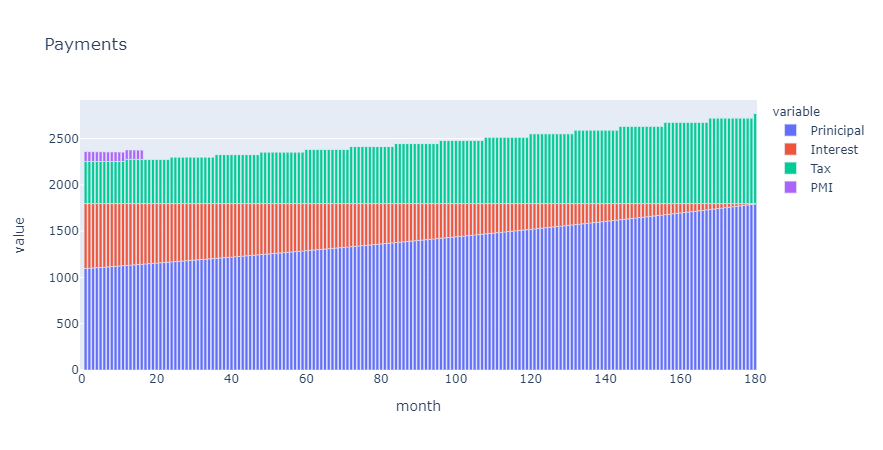

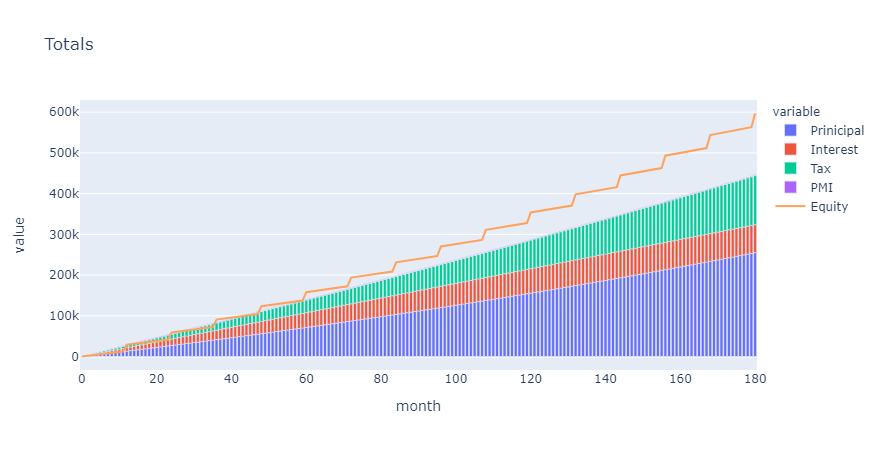

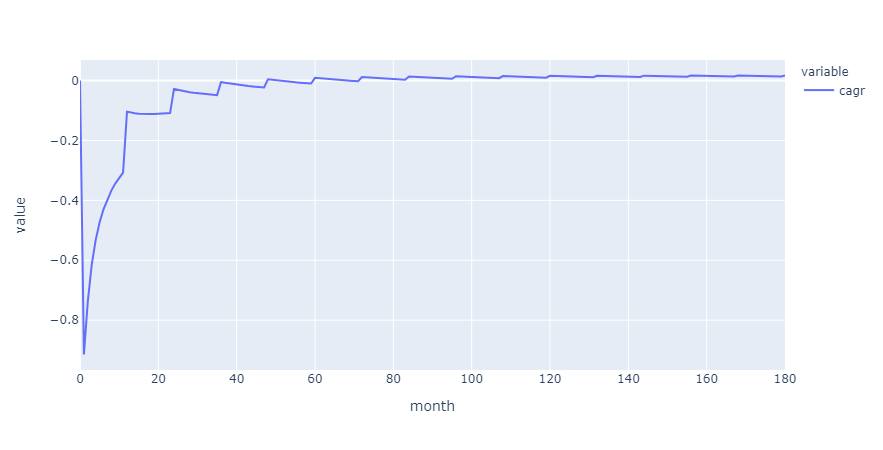

In [12]:
# %%timeit -n 100 -r 2
df = dataframes.return_on_investment(
    initial_value=TAX_APPRAISAL_VAL,
    down_payment=DOWN_PAYMENT,
    closing_rate=CLOSING,
    loan_interest_rate=LOAN_APR,
    num_years=YEARS,
    pmi_rate=PMI_RATE,
    property_tax_rate=TAX_APR,
    apprasial_growth=TAX_APPRAISAL_VAL_GROWTH_RATE
)
display(df.round(2))

totals = df[['principal paid', 'interest paid', 'tax paid', 'pmi paid']]
totals.columns = ['Prinicipal', 'Interest', 'Tax', 'PMI']
payments = totals.diff()

fig = px.bar(payments, x=payments.index, y=payments.columns, title='Payments')
fig.show()
fig = px.bar(totals, x=totals.index, y=totals.columns, title='Totals')
fig.add_scatter(x=df.index, y=df['equity'] - DOWN_PAYMENT, name='Equity')
fig.show()
fig = px.line(df, x=df.index, y=['cagr'])
# fig.add_scatter(x=df.index, y=df['equity'])
fig.show()

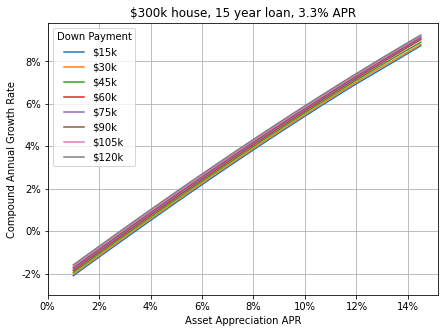

In [5]:
analysis.cagr_vs_growth(
    initial_value=TAX_APPRAISAL_VAL,
    loan_interest_rate=LOAN_APR,
    closing_rate=CLOSING,
    num_years=YEARS,
    pmi_rate=PMI_RATE,
    property_tax_rate=TAX_APR,
    figsize=(7, 5),
    facecolor='white'
)

,200,250,300,350,400,450,500,550,600
down_pmt,,,,,,,,,
25,1.609864,2.058992,2.508119,2.957247,3.406375,3.855503,4.30463,4.753758,5.202886
30,1.572534,2.021662,2.47079,2.919918,3.369045,3.818173,4.267301,4.716429,5.165557
35,1.535205,1.984333,2.43346,2.882588,3.331716,3.780844,4.229972,4.679099,5.128227
40,1.431496,1.947003,2.396131,2.845259,3.294387,3.743514,4.192642,4.64177,5.090898
45,1.396241,1.909674,2.358802,2.807929,3.257057,3.706185,4.155313,4.60444,5.053568
50,1.360985,1.789369,2.321472,2.7706,3.219728,3.668855,4.117983,4.567111,5.016239
55,1.32573,1.754114,2.284143,2.73327,3.182398,3.631526,4.080654,4.529782,4.978909
60,1.290475,1.718859,2.147243,2.695941,3.145069,3.594197,4.043324,4.492452,4.94158
65,1.25522,1.683604,2.111988,2.658612,3.107739,3.556867,4.005995,4.455123,4.90425


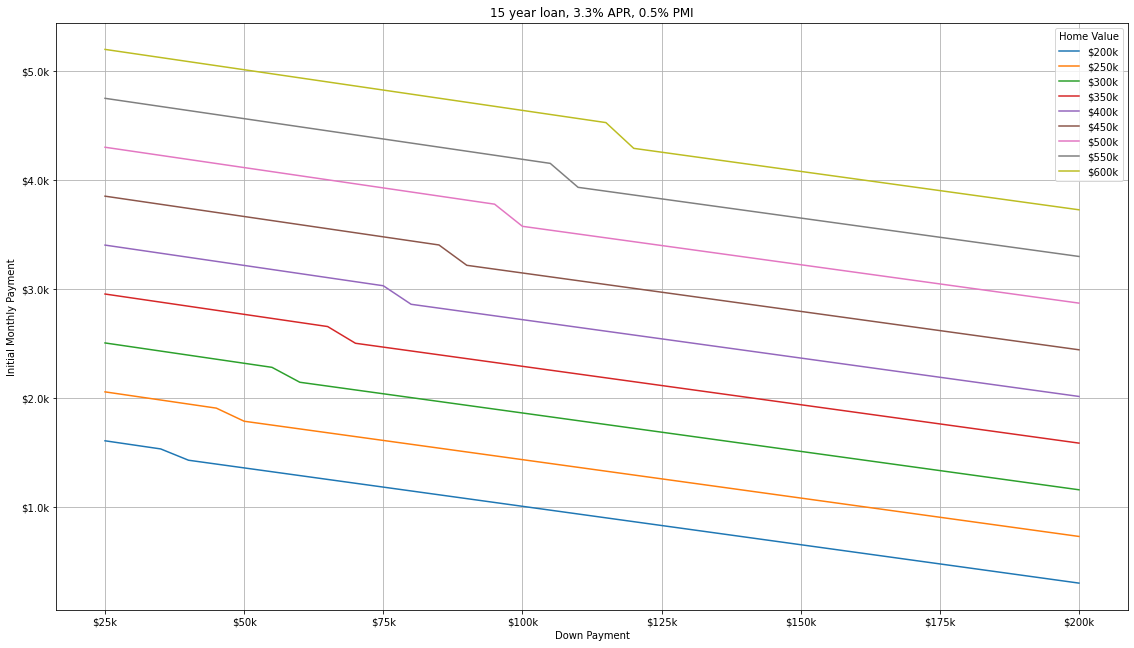

In [6]:
# %%timeit -n 2 -r 1
df = analysis.monthly_payment_vs_down_pmt(
    loan_interest_rate=LOAN_APR,
    closing_rate=CLOSING,
    num_years=YEARS,
    pmi_rate=PMI_RATE,
    property_tax_rate=TAX_APR,
    figsize=(19.2, 10.8),
    facecolor='white'
)
df

# Property Tax

<span style="color:red">
</span>

In [7]:
tax_df = dataframes.property_tax_amortization(TAX_APPRAISAL_VAL, TAX_APR, YEARS + 1, TAX_APPRAISAL_VAL_GROWTH_RATE)
tax_df.index = pd.Index(data=(tax_df.index - 1)*12, name='month')
tax_df = tax_df.reindex(np.arange(tax_df.index[-1] + 1), method='pad')
display(tax_df.round(2))

,appraisal value,annual tax owed,monthly tax payment
month,,,
0,300000.00,5460.00,455.00
1,300000.00,5460.00,455.00
2,300000.00,5460.00,455.00
3,300000.00,5460.00,455.00
4,300000.00,5460.00,455.00
...,...,...,...
176,610016.54,11102.30,925.19
177,610016.54,11102.30,925.19
178,610016.54,11102.30,925.19


# Mortgage Amortization

In [8]:
df = dataframes.mortgage_amortization(PRINCIPAL, DOWN_PAYMENT, LOAN_APR, YEARS)
display(df.round(2))

,mortgage balance,mortgage payment,total paid,equity,principal paid,interest paid
month,,,,,,
0,230000.00,0.00,0.00,70000.00,0.00,0.00
1,229010.77,1621.73,1621.73,70989.23,989.23,632.50
2,228018.81,1621.73,3243.47,71981.19,1981.19,1262.28
3,227024.13,1621.73,4865.20,72975.87,2975.87,1889.33
4,226026.71,1621.73,6486.93,73973.29,3973.29,2513.65
...,...,...,...,...,...,...
176,6442.58,1621.73,285425.05,293557.42,223557.42,61867.63
177,4838.56,1621.73,287046.78,295161.44,225161.44,61885.35
178,3230.14,1621.73,288668.52,296769.86,226769.86,61898.65
